<a href="https://colab.research.google.com/github/Saish31/AIML/blob/main/Zero_Shot_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zero-Shot Image Classification

Zero-Shot Image Classification is a machine learning approach where a model classifies images into categories that it hasn't seen during training. Instead of learning specific labels, the model understands high-level concepts and matches visual features of the image with semantic descriptions of possible classes.

In [ ]:
%pip install sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch

In [ ]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

In [ ]:
dog_names = list(glob.glob('/content/dog-cat-full-dataset/data/train/dogs/*jpg'))[:100]
cat_names = list(glob.glob('/content/dog-cat-full-dataset/data/train/cats/*jpg'))[:100]
img_names = dog_names + cat_names

In [ ]:
from random import shuffle
shuffle(img_names)

CLIP-ViT-B/32 is a widely used variant of OpenAI's CLIP model that uses a Vision Transformer (ViT-B/32) for image encoding. It's lightweight and fast while still providing strong zero-shot classification performance.

In [ ]:
model = SentenceTransformer('clip-ViT-B-32')
img_embed = model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True)

In [ ]:
labels = ['dog', 'cat']

label_embed = model.encode(labels, convert_to_tensor=True)
cos_scores = util.cos_sim(img_embed, label_embed)

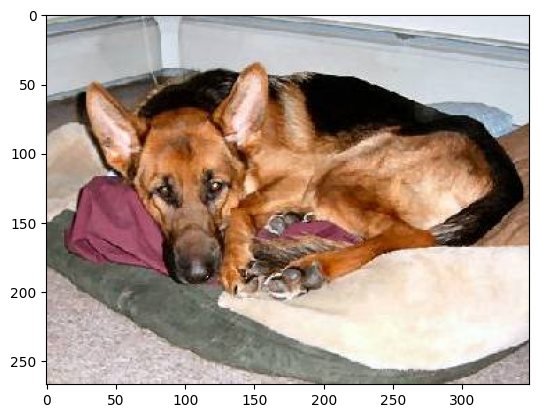

Predicted Label: dog
-----




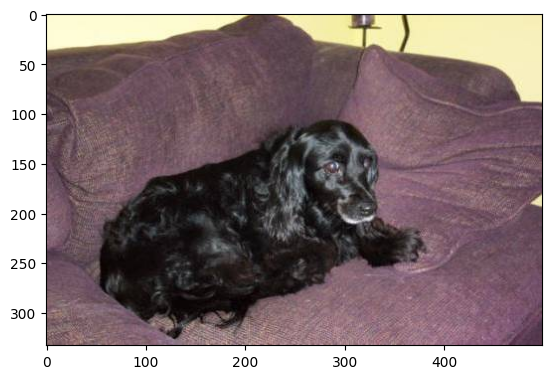

Predicted Label: dog
-----




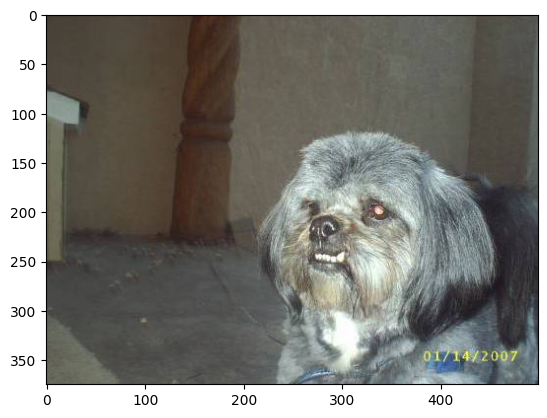

Predicted Label: dog
-----




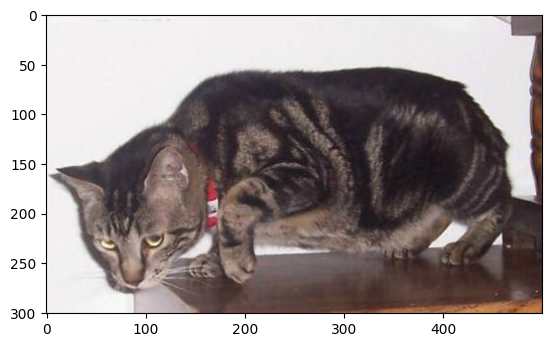

Predicted Label: cat
-----




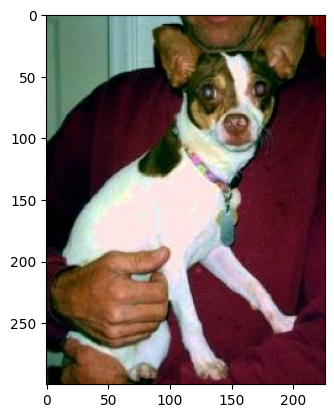

Predicted Label: dog
-----




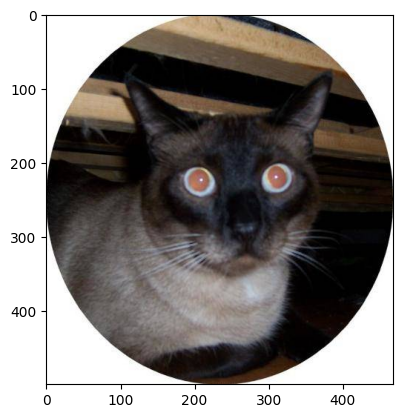

Predicted Label: cat
-----




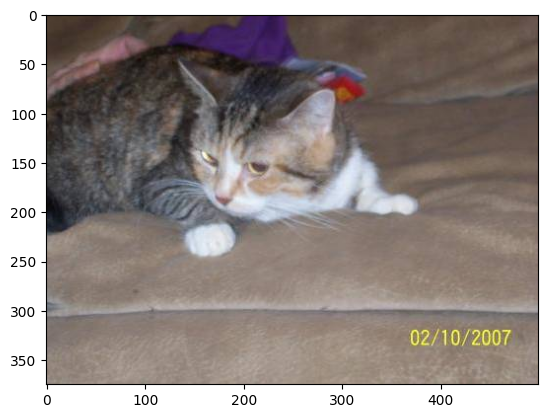

Predicted Label: cat
-----




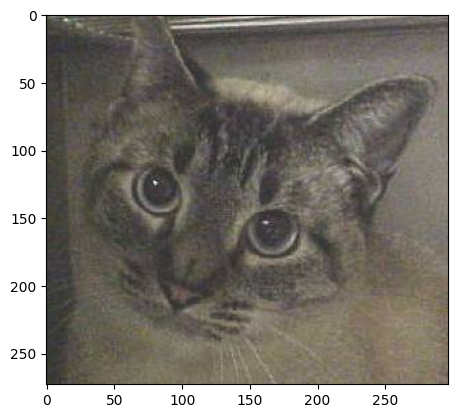

Predicted Label: cat
-----




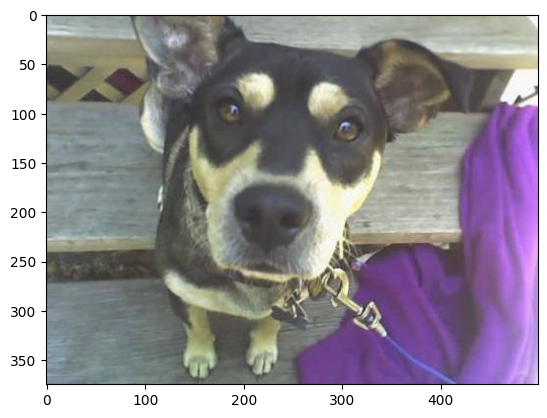

Predicted Label: dog
-----




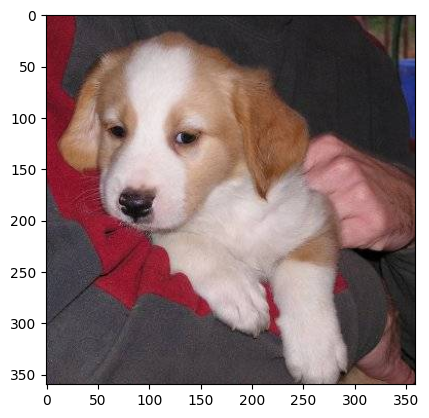

Predicted Label: dog
-----




In [ ]:
pred_labels = torch.argmax(cos_scores, dim=1)

for img_name, pred_label in zip(img_names[10:20], pred_labels[10:20]):
  im = Image.open(img_name)
  plt.figure()
  plt.imshow(im)
  plt.show()
  print("Predicted Label:", labels[pred_label])
  print("-----\n\n")